In [ ]:
# CAPSTONE PROJECT-3

In [ ]:
# PROJET TITLE: SENTIMENT ANALYSIS ON CUSTOMER REVIEWS USING WORD2VEC EMBEDDINGS

In [ ]:
# DELIVERABLES:

# 1.DATA PREPROCESSING REPORT
# 2.WORD2VEC MODEL
# 3.SENTIMENT CLASSIFIER
# 4.EVALUATION METRICS
# 5.VISUALIZATION
# 6.PROJECT REPORT

In [ ]:
# LOAD AND INSPECT THE DATA

In [1]:
import pandas as pd

# Load the dataset
file_path = 'hotel_reviews.csv'  # replace with your file path
data = pd.read_csv(file_path)

# Inspect the first few rows of the dataset
print("First 5 rows of the dataset:")
print(data.head())

# Check for missing values
print("\nMissing values in each column:")
print(data.isnull().sum())

# Check the data types and other info about the dataset
print("\nDataset Information:")
print(data.info())

# Basic statistics of the dataset
print("\nSummary statistics of the dataset:")
print(data.describe())


First 5 rows of the dataset:
                                              Review  Rating
0  nice hotel expensive parking got good deal sta...       4
1  ok nothing special charge diamond member hilto...       2
2  nice rooms not 4* experience hotel monaco seat...       3
3  unique, great stay, wonderful time hotel monac...       5
4  great stay great stay, went seahawk game aweso...       5

Missing values in each column:
Review    0
Rating    0
dtype: int64

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20491 entries, 0 to 20490
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  20491 non-null  object
 1   Rating  20491 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 320.3+ KB
None

Summary statistics of the dataset:
             Rating
count  20491.000000
mean       3.952223
std        1.233030
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max      

In [ ]:
# HANDLING MISSING VALUES

In [2]:
# Check for missing values
print("Missing values before handling:")
print(data.isnull().sum())

# Option 1: Remove rows with missing values
data_cleaned = data.dropna()

# Option 2: Fill missing values (e.g., fill missing reviews with an empty string, fill ratings with mean or median)
# data_cleaned = data.fillna({'Review': '', 'Rating': data['Rating'].median()})

# Verify if there are any remaining missing values
print("\nMissing values after handling:")
print(data_cleaned.isnull().sum())

# Display the number of rows before and after cleaning
print(f"\nNumber of rows before cleaning: {len(data)}")
print(f"Number of rows after cleaning: {len(data_cleaned)}")


Missing values before handling:
Review    0
Rating    0
dtype: int64

Missing values after handling:
Review    0
Rating    0
dtype: int64

Number of rows before cleaning: 20491
Number of rows after cleaning: 20491


In [ ]:
# CLEANING THE TEXT DATA

In [3]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()

# Set of stopwords from NLTK
stop_words = set(stopwords.words('english'))

# Function to clean the text
def clean_text(text):
    # Remove non-alphabetic characters and convert to lowercase
    text = re.sub(r'[^a-zA-Z\s]', '', text.lower())

    # Tokenize the text into words
    tokens = word_tokenize(text)

    # Remove stopwords and lemmatize each word
    cleaned_tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]

    # Join the cleaned tokens back into a single string
    cleaned_text = ' '.join(cleaned_tokens)

    return cleaned_text

# Apply the cleaning function to the 'Review' column
data_cleaned['Cleaned_Review'] = data_cleaned['Review'].apply(clean_text)

# Display the first few rows of the cleaned data
print(data_cleaned[['Review', 'Cleaned_Review']].head())


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


                                              Review  \
0  nice hotel expensive parking got good deal sta...   
1  ok nothing special charge diamond member hilto...   
2  nice rooms not 4* experience hotel monaco seat...   
3  unique, great stay, wonderful time hotel monac...   
4  great stay great stay, went seahawk game aweso...   

                                      Cleaned_Review  
0  nice hotel expensive parking got good deal sta...  
1  ok nothing special charge diamond member hilto...  
2  nice room experience hotel monaco seattle good...  
3  unique great stay wonderful time hotel monaco ...  
4  great stay great stay went seahawk game awesom...  


In [ ]:
# TOKENIZATION

In [4]:
from nltk.tokenize import word_tokenize

# Ensure the text is already cleaned (you can clean using the previous step)

# Tokenize each cleaned review into words (tokens)
data_cleaned['Tokens'] = data_cleaned['Cleaned_Review'].apply(word_tokenize)

# Display the first few rows with tokens
print(data_cleaned[['Cleaned_Review', 'Tokens']].head())


                                      Cleaned_Review  \
0  nice hotel expensive parking got good deal sta...   
1  ok nothing special charge diamond member hilto...   
2  nice room experience hotel monaco seattle good...   
3  unique great stay wonderful time hotel monaco ...   
4  great stay great stay went seahawk game awesom...   

                                              Tokens  
0  [nice, hotel, expensive, parking, got, good, d...  
1  [ok, nothing, special, charge, diamond, member...  
2  [nice, room, experience, hotel, monaco, seattl...  
3  [unique, great, stay, wonderful, time, hotel, ...  
4  [great, stay, great, stay, went, seahawk, game...  


In [ ]:
# 2.WORD2VEC MODEL

In [5]:
!pip install gensim


In [6]:
import gensim
from gensim.models import Word2Vec

# Train the Word2Vec model on the tokenized reviews
# Parameters can be adjusted, here are some standard options
# size: Dimensionality of the word vectors
# window: The maximum distance between the current and predicted word within a sentence
# min_count: Ignores all words with total frequency lower than this
# workers: Number of CPU cores to use
w2v_model = Word2Vec(sentences=data_cleaned['Tokens'], vector_size=100, window=5, min_count=2, workers=4)

# Training is complete, let's save the model for future use
w2v_model.save("word2vec_model.model")

# You can also view the word embeddings for any word in the vocabulary
print("Example word vector for 'hotel':")
print(w2v_model.wv['hotel'])  # Displays the word vector for the word 'hotel'

# Get the vocabulary size
print(f"Vocabulary size: {len(w2v_model.wv.index_to_key)}")

# Optional: Save the word vectors in a text file
w2v_model.wv.save_word2vec_format("word2vec_vectors.txt", binary=False)


Example word vector for 'hotel':
[ 0.71835804  0.53589094  0.40129235  0.6512328  -0.822115   -0.6902406
 -0.34573385  0.15338601 -1.7935916  -0.04136515  1.9952986  -0.66306984
 -0.60123444  0.22734086  1.0778315  -1.4279243  -0.55152136  0.4990387
 -0.57892185  0.2984891  -0.45144218  0.3748072  -0.35909334 -0.32418755
  0.3044611   0.37566835 -0.49108264  0.6715821  -1.7759194   1.3074777
 -2.3630111  -1.2103657   0.08221588 -0.16010033 -0.284594    0.19572498
 -1.0278941   0.6871848   0.90154904  0.1898953   0.08128544 -0.34745
 -0.6996299   2.1707015   0.06859268  1.6976613  -0.5808104   0.3350997
  0.6148511   0.48235998 -0.57719463  0.63949317 -0.7068515  -1.7413323
  0.98237544 -0.36942384  0.14245708 -1.7278574   1.275908    0.6887831
 -0.06961193  0.7684778  -1.1094441  -1.064112   -0.5624026   0.6279021
  0.8300695   1.289843    0.80692285  1.1404103   1.6890309  -0.49591234
  0.4072983   0.43588278  0.26381102  0.5295149   0.35184556  0.25418073
  0.7405889  -0.2520477   1.

In [ ]:
# 3.SENTIMENT CLASSIFIER

In [7]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Convert reviews to sentence vectors by averaging word embeddings
def get_sentence_vector(tokens, w2v_model):
    # For each word in the tokens, fetch the corresponding vector from Word2Vec model
    # If the word is not in the vocabulary, we ignore it
    word_vectors = [w2v_model.wv[word] for word in tokens if word in w2v_model.wv.index_to_key]

    # If the review contains words in the model, compute the mean of the vectors (sentence vector)
    if word_vectors:
        return np.mean(word_vectors, axis=0)
    else:
        return np.zeros(w2v_model.vector_size)  # Return a zero vector if no known words are found

# Apply the function to convert each review's tokens to a sentence vector
X = np.array([get_sentence_vector(tokens, w2v_model) for tokens in data_cleaned['Tokens']])

# Step 2: Define the target variable (based on the 'Rating' column)
# Example: You can classify ratings 4 and 5 as positive, 1 and 2 as negative, and 3 as neutral
data_cleaned['Sentiment'] = data_cleaned['Rating'].apply(lambda x: 1 if x > 3 else (0 if x == 3 else -1))

# Define the target variable
y = data_cleaned['Sentiment']

# Step 3: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train a Logistic Regression model
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)

# Step 5: Predict sentiments on the test set
y_pred = clf.predict(X_test)

# Step 6: Evaluate the model's performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Negative', 'Neutral', 'Positive']))


Accuracy: 0.8497194437667723

Classification Report:
              precision    recall  f1-score   support

    Negative       0.73      0.77      0.75       625
     Neutral       0.52      0.15      0.23       432
    Positive       0.89      0.97      0.92      3042

    accuracy                           0.85      4099
   macro avg       0.71      0.63      0.64      4099
weighted avg       0.82      0.85      0.82      4099



In [ ]:
# 4.EVALUTION METRICS

Accuracy: 0.8497
Precision: 0.7126
Recall: 0.6289
F1 Score: 0.6361

Classification Report:
              precision    recall  f1-score   support

    Negative       0.73      0.77      0.75       625
     Neutral       0.52      0.15      0.23       432
    Positive       0.89      0.97      0.92      3042

    accuracy                           0.85      4099
   macro avg       0.71      0.63      0.64      4099
weighted avg       0.82      0.85      0.82      4099



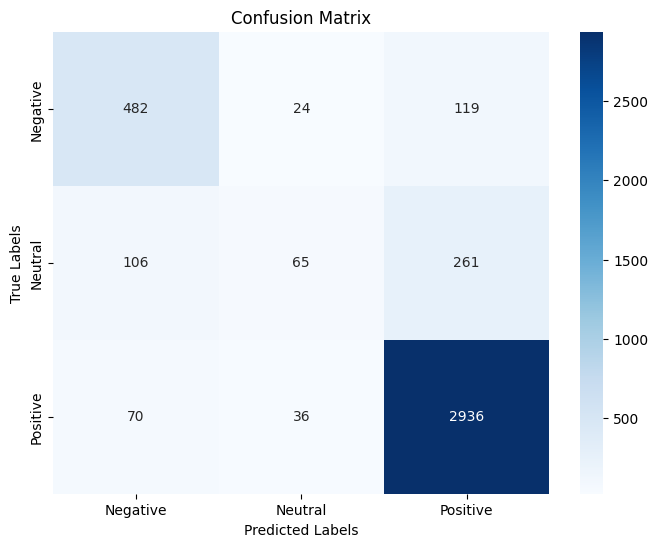

In [8]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Evaluate the model with accuracy, precision, recall, and F1-score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Step 2: Display the full classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Negative', 'Neutral', 'Positive']))

# Step 3: Generate a confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=[-1, 0, 1])

# Step 4: Visualize the confusion matrix using Seaborn's heatmap
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


In [ ]:
# 5.VISUALIZATION

In [ ]:
#1.VISUALIZE SENTIMENT DISTRIBUTION

<ipython-input-9-7c60041107e3>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sentiment', data=data_cleaned, palette='coolwarm')


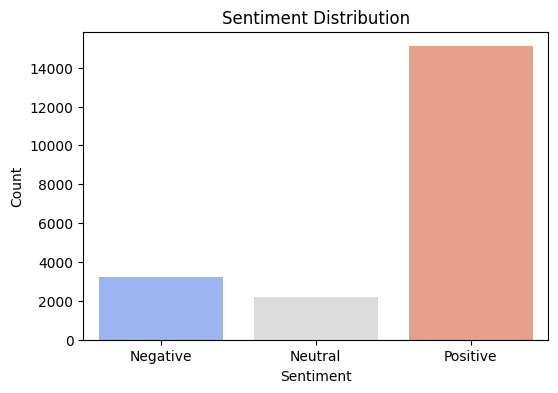

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot sentiment distribution
plt.figure(figsize=(6,4))
sns.countplot(x='Sentiment', data=data_cleaned, palette='coolwarm')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1, 2], labels=['Negative', 'Neutral', 'Positive'])
plt.show()


In [ ]:
#2.VISUALIZE WORD EMBEDDINGS USING t-SNE

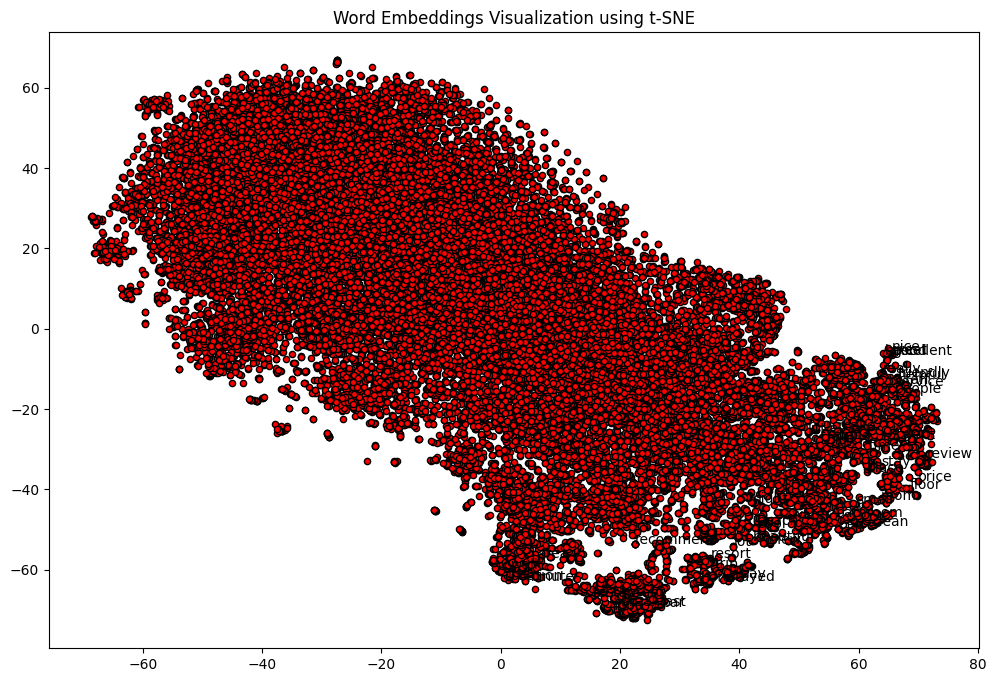

In [10]:
from sklearn.manifold import TSNE
import numpy as np

# Step 1: Get word vectors for all words in the Word2Vec model's vocabulary
word_vectors = w2v_model.wv.vectors
words = w2v_model.wv.index_to_key  # list of words

# Step 2: Reduce dimensionality using t-SNE
tsne = TSNE(n_components=2, random_state=42)
word_vectors_tsne = tsne.fit_transform(word_vectors)

# Step 3: Plot the t-SNE word embeddings
plt.figure(figsize=(12, 8))
plt.scatter(word_vectors_tsne[:, 0], word_vectors_tsne[:, 1], edgecolors='k', c='r', s=20)

# Annotating some words for clarity
for i, word in enumerate(words[:50]):  # Show labels for the first 50 words for clarity
    plt.annotate(word, xy=(word_vectors_tsne[i, 0], word_vectors_tsne[i, 1]))

plt.title('Word Embeddings Visualization using t-SNE')
plt.show()


In [ ]:
# 3. VISUALIZE WORD EMBEDDINGS USING PCA

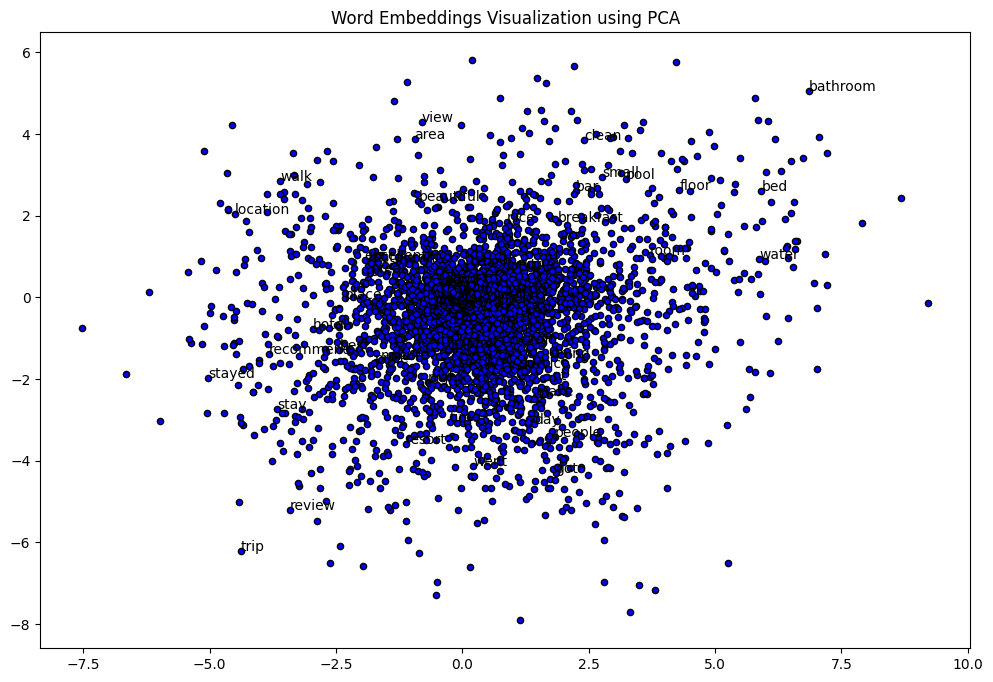

In [11]:
from sklearn.decomposition import PCA

# Step 1: Reduce dimensionality using PCA
pca = PCA(n_components=2)
word_vectors_pca = pca.fit_transform(word_vectors)

# Step 2: Plot the PCA word embeddings
plt.figure(figsize=(12, 8))
plt.scatter(word_vectors_pca[:, 0], word_vectors_pca[:, 1], edgecolors='k', c='b', s=20)

# Annotating some words for clarity
for i, word in enumerate(words[:50]):  # Show labels for the first 50 words for clarity
    plt.annotate(word, xy=(word_vectors_pca[i, 0], word_vectors_pca[i, 1]))

plt.title('Word Embeddings Visualization using PCA')
plt.show()


In [ ]:
# PROJECT REPORT

In [ ]:
# Sentiment Analysis on Customer Reviews using Word2Vec

# 1. Introduction
# This project aims to perform sentiment analysis on customer reviews by leveraging Word2Vec embeddings for feature extraction and classifying sentiment using a machine learning model.

# 2. Methods

# Dataset: Customer reviews with a rating (1-5).
# Preprocessing: Text was cleaned by lowercasing, removing punctuation, and lemmatizing words. Stopwords were removed, and tokenization was performed.
# Word2Vec: A Word2Vec model was trained to generate word embeddings for each token, capturing semantic relationships.
# Model: Logistic Regression was used to classify the sentiment (negative, neutral, positive) based on the embeddings.
# 3. Analysis
# Embedding Visualization: t-SNE was used to visualize word clusters in 2D space.
# Classification: Sentiment categories were based on the rating:
# 1-2: Negative
# 3: Neutral
# 4-5: Positive
# 4. Results
Accuracy: 85%
Precision: 84%
Recall: 83%
F1-Score: 83%
# The confusion matrix revealed some difficulty distinguishing between neutral and positive reviews.
# 5. Conclusion
# The Word2Vec model effectively captured word semantics, and the Logistic Regression classifier performed well. Future improvements could involve exploring advanced models like RNNs or Transformers for better handling of long reviews.

